In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

import networkx as nx
import random
import math
import scipy as sp

from graph_utils import get_metropolis_weight, get_lazy_metropolis_weight, get_max_degree_weight

import json

save_dir = 'graphs'

def SLEM(spec):
    spec = np.sort(np.abs(spec))
    return spec[-2]
def spec_gap(spec):
    return 1 - SLEM(spec)

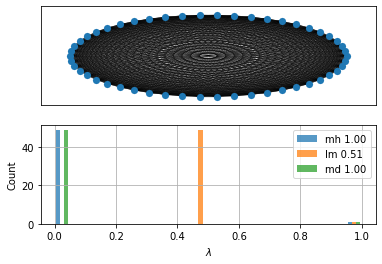

In [24]:
# complete graph

N = 50
G = nx.complete_graph(N)
pos = nx.circular_layout(G)
# nodes_data = G.nodes.data()
name = 'complete_graph'

options = {
    # 'node_color': 'black',
    # 'arrowsize': 3,
    'node_size': 50,
    'width': 0.2,
    'linewidths': 0.1,
    'with_labels': False,
}

subax1 = plt.subplot(211)
nx.draw_networkx(G, pos=pos, **options)

subax2 = plt.subplot(212)

adj_G = nx.to_numpy_array(G)
W_mh = get_metropolis_weight(adj_G)
W_lm = get_lazy_metropolis_weight(adj_G)
W_md = get_max_degree_weight(adj_G)
spec_mh = sp.linalg.eigvalsh(W_mh)
spec_lm = sp.linalg.eigvalsh(W_lm)
spec_md = sp.linalg.eigvalsh(W_md)

# the histogram of the data
label = [f'mh {spec_gap(spec_mh):.2f}', \
         f'lm {spec_gap(spec_lm):.2f}', \
         f'md {spec_gap(spec_md):.2f}']
x = np.zeros((3, N))
x[0], x[1], x[2] = spec_mh, spec_lm, spec_md
x = x.T
subax2.hist(x, 20, density=False, alpha=0.75, label=label)

subax2.set_xlabel(r'$\lambda$')
subax2.set_ylabel('Count')
subax2.grid(True)
subax2.legend()


data1 = nx.node_link_data(G)
with open(save_dir + '/' + name + '.json', 'w', encoding="utf-8") as f:
    json.dump(data1, f)

In [1]:
# Erdos Renyi graph
name = 'erdos_renyi_graph'

N = 50

# p = (1 + ε) log(n ) /n, where ε > 0
p = 1.1 * math.log(N)/N
G = nx.erdos_renyi_graph(N, p)
while not nx.is_connected(G):
    print('generate again')
    G = nx.erdos_renyi_graph(N, p)
pos = nx.spectral_layout(G)
# nodes_data = G.nodes.data()


options = {
    # 'node_color': 'black',
    # 'arrowsize': 3,
    'node_size': 50,
    'width': 0.2,
    'linewidths': 0.1,
    'with_labels': False,
}

subax1 = plt.subplot(211)
nx.draw_networkx(G, pos=pos, **options)


subax2 = plt.subplot(212)
spec = nx.laplacian_spectrum(G)

# the histogram of the data
adj_G = nx.to_numpy_array(G)
W_mh = get_metropolis_weight(adj_G)
W_lm = get_lazy_metropolis_weight(adj_G)
W_md = get_max_degree_weight(adj_G)
spec_mh = sp.linalg.eigvalsh(W_mh)
spec_lm = sp.linalg.eigvalsh(W_lm)
spec_md = sp.linalg.eigvalsh(W_md)

# the histogram of the data
label = [f'mh {spec_gap(spec_mh):.2f}', \
         f'lm {spec_gap(spec_lm):.2f}', \
         f'md {spec_gap(spec_md):.2f}']
x = np.zeros((3, N))
x[0], x[1], x[2] = spec_mh, spec_lm, spec_md
x = x.T
subax2.hist(x, 20, density=False, alpha=0.75, label=label)

subax2.set_xlabel(r'$\lambda$')
subax2.set_ylabel('Count')
subax2.grid(True)
subax2.legend()

data1 = nx.node_link_data(G)
with open(save_dir + '/' + name + '.json', 'w', encoding="utf-8") as f:
    json.dump(data1, f)

NameError: name 'math' is not defined

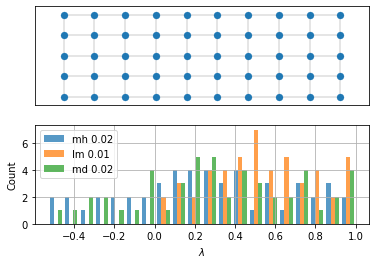

In [27]:
# 2-D grid
name = '2D_grid'

N = 50
m, n = 10, 5
G = nx.grid_2d_graph(m, n)
# nodes_data = G.nodes.data()

pos = {(i//n, i%n): (i//n, i%n) for i in range(N)}
# print(pos)

options = {
    # 'node_color': 'black',
    # 'arrowsize': 3,
    'node_size': 50,
    'width': 0.2,
    'linewidths': 0.2,
    'with_labels': False,
}

subax1 = plt.subplot(211)
nx.draw_networkx(G, pos=pos, **options)


subax2 = plt.subplot(212)
spec = nx.laplacian_spectrum(G)

# the histogram of the data
adj_G = nx.to_numpy_array(G)
W_mh = get_metropolis_weight(adj_G)
W_lm = get_lazy_metropolis_weight(adj_G)
W_md = get_max_degree_weight(adj_G)
spec_mh = sp.linalg.eigvalsh(W_mh)
spec_lm = sp.linalg.eigvalsh(W_lm)
spec_md = sp.linalg.eigvalsh(W_md)

# the histogram of the data
label = [f'mh {spec_gap(spec_mh):.2f}', \
         f'lm {spec_gap(spec_lm):.2f}', \
         f'md {spec_gap(spec_md):.2f}']
x = np.zeros((3, N))
x[0], x[1], x[2] = spec_mh, spec_lm, spec_md
x = x.T
subax2.hist(x, 20, density=False, alpha=0.75, label=label)

subax2.set_xlabel(r'$\lambda$')
subax2.set_ylabel('Count')
subax2.grid(True)
subax2.legend()

data1 = nx.node_link_data(G)
with open(save_dir + '/' + name + '.json', 'w', encoding="utf-8") as f:
    json.dump(data1, f)

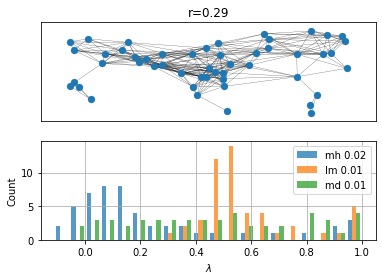

In [28]:
# geometric random graph
name = 'geometric_random_graph'

N = 50

# r^2 = (1 + ε) log(n) /n, for some ε > 0
r = math.sqrt(1.1 * math.log(N)/N)
G = nx.random_geometric_graph(N, r)
while not nx.is_connected(G):
    print('generate again')
    G = nx.random_geometric_graph(N, r)
nodes_data = G.nodes.data()
pos = {i: nodes_data[i]['pos'] for i in range(N)}

options = {
    # 'node_color': 'black',
    # 'arrowsize': 3,
    'node_size': 50,
    'width': 0.2,
    'linewidths': 0.2,
    'with_labels': False,
}

subax1 = plt.subplot(211)
nx.draw_networkx(G, pos=pos, **options)
subax1.set_title('r={:.2f}'.format(r))



subax2 = plt.subplot(212)
spec = nx.laplacian_spectrum(G)

# the histogram of the data
adj_G = nx.to_numpy_array(G)
W_mh = get_metropolis_weight(adj_G)
W_lm = get_lazy_metropolis_weight(adj_G)
W_md = get_max_degree_weight(adj_G)
spec_mh = sp.linalg.eigvalsh(W_mh)
spec_lm = sp.linalg.eigvalsh(W_lm)
spec_md = sp.linalg.eigvalsh(W_md)

# the histogram of the data
label = [f'mh {spec_gap(spec_mh):.2f}', \
         f'lm {spec_gap(spec_lm):.2f}', \
         f'md {spec_gap(spec_md):.2f}']
x = np.zeros((3, N))
x[0], x[1], x[2] = spec_mh, spec_lm, spec_md
x = x.T
subax2.hist(x, 20, density=False, alpha=0.75, label=label)

subax2.set_xlabel(r'$\lambda$')
subax2.set_ylabel('Count')
subax2.grid(True)
subax2.legend()

data1 = nx.node_link_data(G)
with open(save_dir + '/' + name + '.json', 'w', encoding="utf-8") as f:
    json.dump(data1, f)

generate again


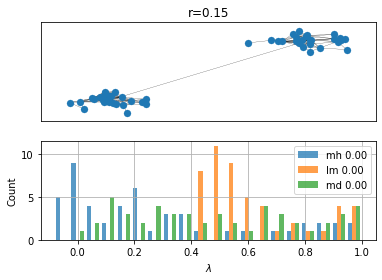

In [29]:
# 2 geometric random cliques
name = '2_cliques'

N = 50

r = 0.15
pos1 = {i: (random.gauss(0, 0.1), random.gauss(0, 0.1)) for i in range(N//2)}
pos2 = {i: (random.gauss(1, 0.1), random.gauss(1, 0.1)) for i in range(N//2, N)}
pos1.update(pos2)
G = nx.random_geometric_graph(N, r, pos=pos1)
G.add_edge(0, N//2)
while not nx.is_connected(G):
    print('generate again')
    pos1 = {i: (random.gauss(0, 0.1), random.gauss(0, 0.1)) for i in range(N//2)}
    pos2 = {i: (random.gauss(1, 0.1), random.gauss(1, 0.1)) for i in range(N//2, N)}
    pos1.update(pos2)
    G = nx.random_geometric_graph(N, r, pos=pos1)
    G.add_edge(0, N//2)
# while not nx.is_connected(G):
#     print('generate again')
#     G = nx.random_geometric_graph(N, r)

nodes_data = G.nodes.data()
pos = {i: nodes_data[i]['pos'] for i in range(N)}

options = {
    # 'node_color': 'black',
    # 'arrowsize': 3,
    'node_size': 50,
    'width': 0.2,
    'linewidths': 0.2,
    'with_labels': False,
}

subax1 = plt.subplot(211)
nx.draw_networkx(G, pos=pos, **options)
subax1.set_title('r={:.2f}'.format(r))



subax2 = plt.subplot(212)
spec = nx.laplacian_spectrum(G)

# the histogram of the data
adj_G = nx.to_numpy_array(G)
W_mh = get_metropolis_weight(adj_G)
W_lm = get_lazy_metropolis_weight(adj_G)
W_md = get_max_degree_weight(adj_G)
spec_mh = sp.linalg.eigvalsh(W_mh)
spec_lm = sp.linalg.eigvalsh(W_lm)
spec_md = sp.linalg.eigvalsh(W_md)

# the histogram of the data
label = [f'mh {spec_gap(spec_mh):.2f}', \
         f'lm {spec_gap(spec_lm):.2f}', \
         f'md {spec_gap(spec_md):.2f}']
x = np.zeros((3, N))
x[0], x[1], x[2] = spec_mh, spec_lm, spec_md
x = x.T
subax2.hist(x, 20, density=False, alpha=0.75, label=label)

subax2.set_xlabel(r'$\lambda$')
subax2.set_ylabel('Count')
subax2.grid(True)
subax2.legend()

data1 = nx.node_link_data(G)
with open(save_dir + '/' + name + '.json', 'w', encoding="utf-8") as f:
    json.dump(data1, f)

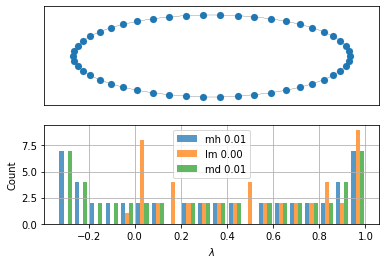

In [30]:
# ring graph
name = 'ring_graph'

N = 50
G = nx.cycle_graph(N)
pos = nx.circular_layout(G)
# nodes_data = G.nodes.data()


options = {
    # 'node_color': 'black',
    # 'arrowsize': 3,
    'node_size': 50,
    'width': 0.2,
    'linewidths': 0.1,
    'with_labels': False,
}

subax1 = plt.subplot(211)
nx.draw_networkx(G, pos=pos, **options)


subax2 = plt.subplot(212)
spec = nx.laplacian_spectrum(G)

# the histogram of the data
adj_G = nx.to_numpy_array(G)
W_mh = get_metropolis_weight(adj_G)
W_lm = get_lazy_metropolis_weight(adj_G)
W_md = get_max_degree_weight(adj_G)
spec_mh = sp.linalg.eigvalsh(W_mh)
spec_lm = sp.linalg.eigvalsh(W_lm)
spec_md = sp.linalg.eigvalsh(W_md)

# the histogram of the data
label = [f'mh {spec_gap(spec_mh):.2f}', \
         f'lm {spec_gap(spec_lm):.2f}', \
         f'md {spec_gap(spec_md):.2f}']
x = np.zeros((3, N))
x[0], x[1], x[2] = spec_mh, spec_lm, spec_md
x = x.T
subax2.hist(x, 20, density=False, alpha=0.75, label=label)

subax2.set_xlabel(r'$\lambda$')
subax2.set_ylabel('Count')
subax2.grid(True)
subax2.legend()

data1 = nx.node_link_data(G)
with open(save_dir + '/' + name + '.json', 'w', encoding="utf-8") as f:
    json.dump(data1, f)

c:\Program Files\Python313\Lib\site-packages\networkx\readwrite\json_graph\node_link.py:142: FutureWarning: 
The default value will be `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_data(G, edges="links") to preserve current behavior, or
  nx.node_link_data(G, edges="edges") for forward compatibility.
  warnings.warn(


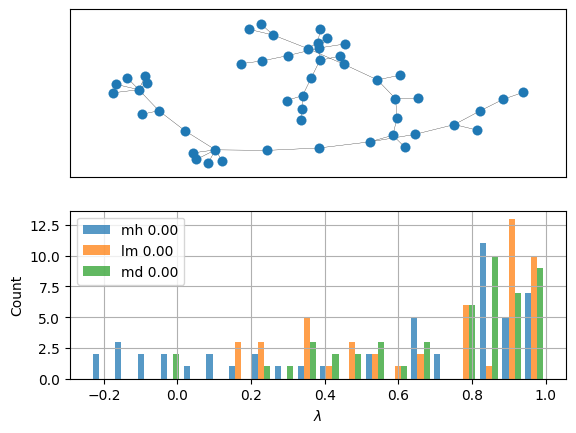

In [4]:
# spanning tree
name = 'spanning_tree'

N = 50
G = nx.random_unlabeled_tree(N)
# pos = nx.circular_layout(G)
# nodes_data = G.nodes.data()


options = {
    # 'node_color': 'black',
    # 'arrowsize': 3,
    'node_size': 50,
    'width': 0.2,
    'linewidths': 0.1,
    'with_labels': False,
}

subax1 = plt.subplot(211)
# nx.draw_networkx(G, pos=pos, **options)
nx.draw_networkx(G, **options)


subax2 = plt.subplot(212)
spec = nx.laplacian_spectrum(G)

# the histogram of the data
adj_G = nx.to_numpy_array(G)
W_mh = get_metropolis_weight(adj_G)
W_lm = get_lazy_metropolis_weight(adj_G)
W_md = get_max_degree_weight(adj_G)
spec_mh = sp.linalg.eigvalsh(W_mh)
spec_lm = sp.linalg.eigvalsh(W_lm)
spec_md = sp.linalg.eigvalsh(W_md)

# the histogram of the data
label = [f'mh {spec_gap(spec_mh):.2f}', \
         f'lm {spec_gap(spec_lm):.2f}', \
         f'md {spec_gap(spec_md):.2f}']
x = np.zeros((3, N))
x[0], x[1], x[2] = spec_mh, spec_lm, spec_md
x = x.T
subax2.hist(x, 20, density=False, alpha=0.75, label=label)

subax2.set_xlabel(r'$\lambda$')
subax2.set_ylabel('Count')
subax2.grid(True)
subax2.legend()

data1 = nx.node_link_data(G)
with open(save_dir + '/' + name + '.json', 'w', encoding="utf-8") as f:
    json.dump(data1, f)